In [64]:
# =====================================================
# CELL 1 - Import Library
# =====================================================

import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# =====================================================
# CELL 2 - Fungsi Simulasi M/M/1 (Event-Driven)
# =====================================================

def simulate_mm1(lambda_rate, mu_rate, n_customers=10000, seed=42):
    """
    Simulasi sistem antrian M/M/1 (kasir minimarket)
    """

    np.random.seed(seed)

    interarrival_times = np.random.exponential(
        scale=1 / lambda_rate,
        size=n_customers
    )

    service_times = np.random.exponential(
        scale=1 / mu_rate,
        size=n_customers
    )

    arrival_times = np.cumsum(interarrival_times)

    start_service_times = np.zeros(n_customers)
    departure_times = np.zeros(n_customers)

    for i in range(n_customers):
        if i == 0:
            start_service_times[i] = arrival_times[i]
        else:
            start_service_times[i] = max(
                arrival_times[i],
                departure_times[i - 1]
            )

        departure_times[i] = (
            start_service_times[i] + service_times[i]
        )

    waiting_times = start_service_times - arrival_times
    system_times = departure_times - arrival_times

    return waiting_times, system_times

In [66]:
# =====================================================
# CELL 3 - Fungsi Teori Sistem Antrian M/M/1
# =====================================================

def mm1_theoretical(lambda_rate, mu_rate):
    """
    Perhitungan teori M/M/1
    """
    if lambda_rate >= mu_rate:
        raise ValueError("Sistem tidak stabil (λ ≥ μ)")

    rho = lambda_rate / mu_rate
    Wq = rho / (mu_rate - lambda_rate)
    Ws = 1 / (mu_rate - lambda_rate)

    return rho, Wq, Ws


In [ ]:
# =====================================================
# CELL 4 - Parameter Kasus Minimarket
# =====================================================

# Jam normal
lambda_normal = 2.0     
# Jam sibuk
lambda_peak = 2.7       
# Kapasitas kasir
mu_rate = 3.0 
          
n_customers = 10000


In [68]:
# =====================================================
# CELL 5 - Menjalankan Simulasi
# =====================================================

# Simulasi jam normal
waiting_normal, system_normal = simulate_mm1(
    lambda_rate=lambda_normal,
    mu_rate=mu_rate,
    n_customers=n_customers,
    seed=42
)

# Simulasi jam sibuk
waiting_peak, system_peak = simulate_mm1(
    lambda_rate=lambda_peak,
    mu_rate=mu_rate,
    n_customers=n_customers,
    seed=42
)

# Rata-rata hasil simulasi
Wq_normal = waiting_normal.mean()
Ws_normal = system_normal.mean()

Wq_peak = waiting_peak.mean()
Ws_peak = system_peak.mean()

# Nilai teori
rho_normal, Wq_th_normal, Ws_th_normal = mm1_theoretical(
    lambda_normal, mu_rate
)

rho_peak, Wq_th_peak, Ws_th_peak = mm1_theoretical(
    lambda_peak, mu_rate
)

In [69]:
# =====================================================
# CELL 6 - Output Ringkas ke Console
# =====================================================

print("=== Kasir Minimarket (M/M/1) ===\n")

print(">> Jam Normal")
print(f"Utilization (p) : {rho_normal:.3f}")
print(f"Wq Teori        : {Wq_th_normal:.4f}")
print(f"Wq Simulasi     : {Wq_normal:.4f}")
print(f"Ws Teori        : {Ws_th_normal:.4f}")
print(f"Ws Simulasi     : {Ws_normal:.4f}\n")

print(">> Jam Sibuk")
print(f"Utilization (p) : {rho_peak:.3f}")
print(f"Wq Teori        : {Wq_th_peak:.4f}")
print(f"Wq Simulasi     : {Wq_peak:.4f}")
print(f"Ws Teori        : {Ws_th_peak:.4f}")
print(f"Ws Simulasi     : {Ws_peak:.4f}")

=== Kasir Minimarket (M/M/1) ===

>> Jam Normal
Utilization (p) : 0.667
Wq Teori        : 0.6667
Wq Simulasi     : 0.7643
Ws Teori        : 1.0000
Ws Simulasi     : 1.1038

>> Jam Sibuk
Utilization (p) : 0.900
Wq Teori        : 3.0000
Wq Simulasi     : 5.1444
Ws Teori        : 3.3333
Ws Simulasi     : 5.4839


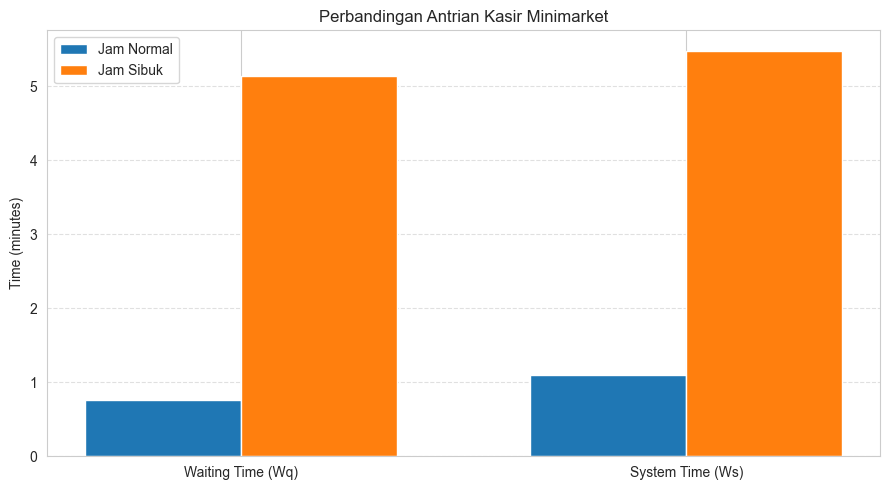

In [70]:
# =====================================================
# CELL 7 - Visualisasi Perbandingan Jam Normal vs Jam Sibuk
# =====================================================

os.makedirs("../Result", exist_ok=True)

labels = ["Waiting Time (Wq)", "System Time (Ws)"]
normal_values = [Wq_normal, Ws_normal]
peak_values = [Wq_peak, Ws_peak]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(9, 5))
plt.bar(x - width / 2, normal_values, width, label="Jam Normal")
plt.bar(x + width / 2, peak_values, width, label="Jam Sibuk")

plt.ylabel("Time (minutes)")
plt.title("Perbandingan Antrian Kasir Minimarket")
plt.xticks(x, labels)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.savefig("../Result/mm1_normal_vs_peak.png")
plt.show()

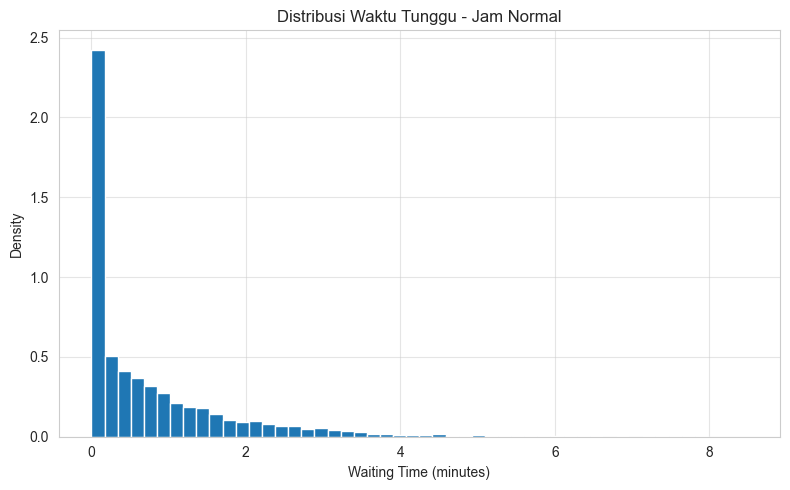

In [71]:
# =====================================================
# CELL 8 - Distribusi Waktu Tunggu (Jam Normal)
# =====================================================

plt.figure(figsize=(8, 5))
plt.hist(
    waiting_normal,
    bins=50,
    density=True
)

plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Density")
plt.title("Distribusi Waktu Tunggu - Jam Normal")
plt.grid(alpha=0.5)

plt.tight_layout()
plt.savefig("../Result/distribusi_waktu_tunggu_normal.png")
plt.show()

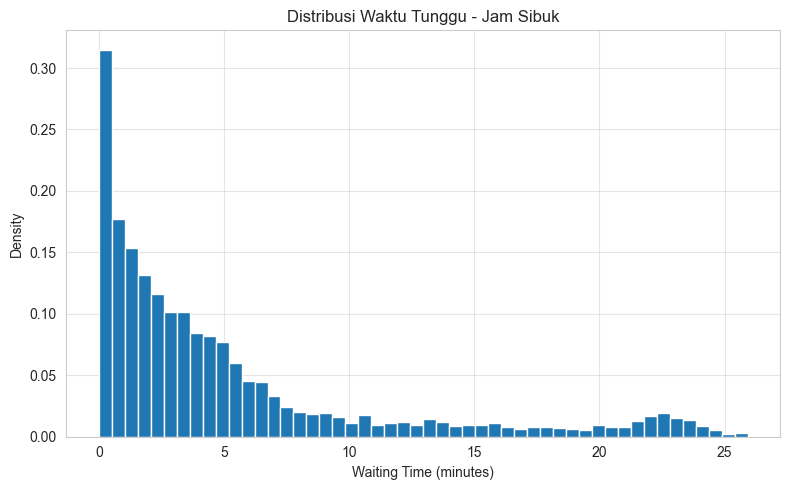

In [72]:
# =====================================================
# CELL 9 - Distribusi Waktu Tunggu (Jam Sibuk)
# =====================================================

plt.figure(figsize=(8, 5))
plt.hist(
    waiting_peak,
    bins=50,
    density=True
)

plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Density")
plt.title("Distribusi Waktu Tunggu - Jam Sibuk")
plt.grid(alpha=0.5)

plt.tight_layout()
plt.savefig("../Result/distribusi_waktu_tunggu_sibuk.png")
plt.show()

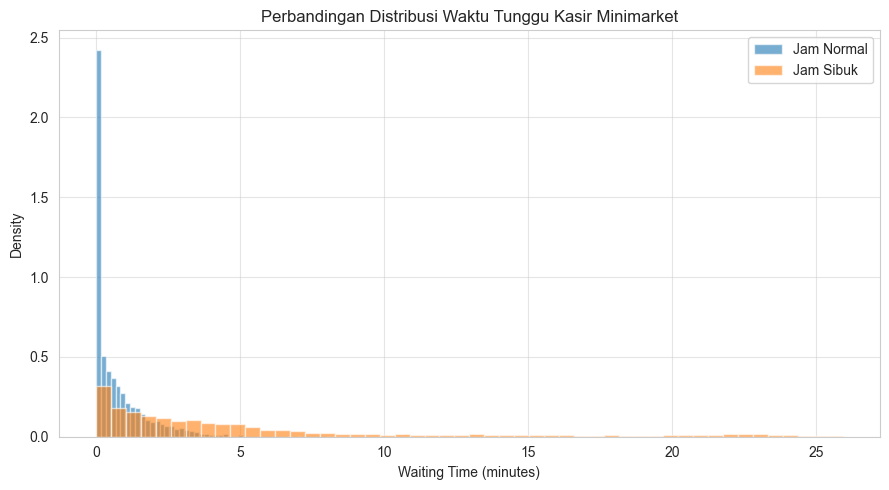

In [73]:
# =====================================================
# CELL 10 - Perbandingan Distribusi Waktu Tunggu
# =====================================================

plt.figure(figsize=(9, 5))

plt.hist(
    waiting_normal,
    bins=50,
    density=True,
    alpha=0.6,
    label="Jam Normal"
)

plt.hist(
    waiting_peak,
    bins=50,
    density=True,
    alpha=0.6,
    label="Jam Sibuk"
)

plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Density")
plt.title("Perbandingan Distribusi Waktu Tunggu Kasir Minimarket")
plt.legend()
plt.grid(alpha=0.5)

plt.tight_layout()
plt.savefig("../Result/distribusi_waktu_tunggu_perbandingan.png")
plt.show()